In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('../Dataset/WHO-COVID-19-global-data.csv',encoding='utf-8')

# Exploring the Dataset

In [3]:
df.head()

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
0,2020-01-05,AF,Afghanistan,EMRO,NaN,0,NaN,0
1,2020-01-12,AF,Afghanistan,EMRO,NaN,0,NaN,0
2,2020-01-19,AF,Afghanistan,EMRO,NaN,0,NaN,0
3,2020-01-26,AF,Afghanistan,EMRO,NaN,0,NaN,0
4,2020-02-02,AF,Afghanistan,EMRO,NaN,0,NaN,0


In [4]:
df.tail()

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
56155,2024-05-26,ZW,Zimbabwe,AFRO,NaN,266365,NaN,5740
56156,2024-06-02,ZW,Zimbabwe,AFRO,NaN,266365,NaN,5740
56157,2024-06-09,ZW,Zimbabwe,AFRO,NaN,266365,NaN,5740
56158,2024-06-16,ZW,Zimbabwe,AFRO,9.0,266374,NaN,5740
56159,2024-06-23,ZW,Zimbabwe,AFRO,NaN,266374,NaN,5740


In [5]:
df.describe()

,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
count,3.847100e+04,5.616000e+04,24843.000000,5.616000e+04
mean,2.016268e+04,1.749630e+06,283.881657,1.973006e+04
std,2.727253e+05,7.665748e+06,1218.044660,8.102894e+04
min,-6.507900e+04,0.000000e+00,-3432.000000,0.000000e+00
25%,4.400000e+01,3.837750e+03,4.000000,2.600000e+01
50%,4.070000e+02,4.422400e+04,20.000000,5.130000e+02
75%,4.110000e+03,5.145240e+05,106.000000,6.875250e+03
max,4.047548e+07,1.034368e+08,47687.000000,1.189685e+06


# Finding The Null Data

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56160 entries, 0 to 56159
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date_reported      56160 non-null  object 
 1   Country_code       55926 non-null  object 
 2   Country            56160 non-null  object 
 3   WHO_region         51948 non-null  object 
 4   New_cases          38471 non-null  float64
 5   Cumulative_cases   56160 non-null  int64  
 6   New_deaths         24843 non-null  float64
 7   Cumulative_deaths  56160 non-null  int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 3.4+ MB


In [7]:
df.isnull().sum()

Date_reported            0
Country_code           234
Country                  0
WHO_region            4212
New_cases            17689
Cumulative_cases         0
New_deaths           31317
Cumulative_deaths        0
dtype: int64

In [8]:
# Finding the countries with null values in the 'Country_code' column
country_with_null_code = df[df['Country_code'].isnull()]['Country'].unique()
print(country_with_null_code)

['Namibia']


In [9]:
#filling the country code with NM for Namibia
df.loc[df['Country']=='Namibia','Country_code'] = 'NM'

In [10]:
df.isnull().sum()

Date_reported            0
Country_code             0
Country                  0
WHO_region            4212
New_cases            17689
Cumulative_cases         0
New_deaths           31317
Cumulative_deaths        0
dtype: int64

In [11]:
df.fillna({'New_cases': df['New_cases'].mean()}, inplace=True)

In [12]:
df.fillna({'New_deaths': df['New_deaths'].mean()}, inplace=True)

In [13]:
df.isnull().sum()

Date_reported           0
Country_code            0
Country                 0
WHO_region           4212
New_cases               0
Cumulative_cases        0
New_deaths              0
Cumulative_deaths       0
dtype: int64

### Calculate the total number of cases and deaths.

In [14]:
print("Sum of the New_cases column: ", df['New_cases'].sum())
print("Sum of the New_deaths column: ", df['New_deaths'].sum())

Sum of the New_cases column:  1132336064.597229
Sum of the New_deaths column:  15942793.846153844


### Determine the average number of new cases and deaths per day.

In [15]:
print("Average of the New_cases column: ", df['New_cases'].mean())
print("Average of the New_deaths column: ", df['New_deaths'].mean())

Average of the New_cases column:  20162.679212913623
Average of the New_deaths column:  283.88165680473367


### Find the countries with the highest and lowest number of cumulative cases and deaths.

In [16]:
df_country_New_cases = df.groupby('Country')['New_cases'].sum().sort_values(ascending=False)
print("Top 3 Country how have The Maximum Number of cases")
for i in range(3):
    print(df_country_New_cases.index[i],":-", df_country_New_cases.iloc[i])

Top 3 Country how have The Maximum Number of cases
United States of America :- 104666752.43198773
China :- 99362248.0
India :- 45181422.7544904


In [17]:
df_country_New_Daths = df.groupby('Country')['New_deaths'].sum().sort_values(ascending=False)
print("Top 3 Country how have The Maximum Number of cases")
for i in range(3):
    print(df_country_New_Daths.index[i], df_country_New_Daths.iloc[i])

Top 3 Country how have The Maximum Number of cases
United States of America 1191956.0532544379
Brazil 721703.8343195267
India 537311.4615384615


# Time Series Analysis:

###  Plot the daily new cases and deaths over time.

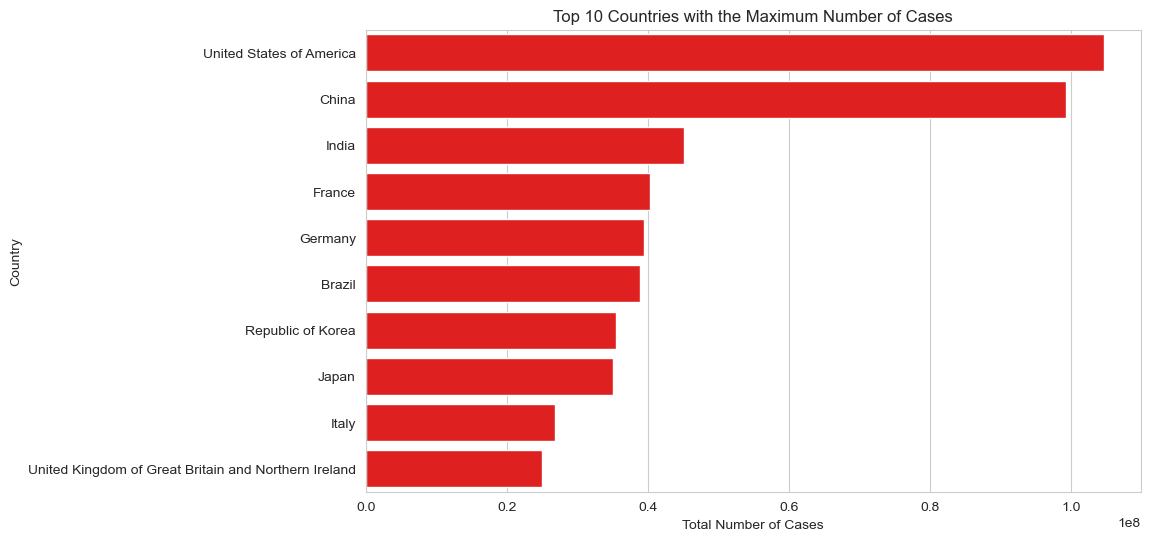

In [18]:
plt.figure(figsize=(10, 6))
sns.barplot(x=df_country_New_cases.values[:10], y=df_country_New_cases.index[:10],color='red')
plt.xlabel('Total Number of Cases')
plt.ylabel('Country')
plt.title('Top 10 Countries with the Maximum Number of Cases')
plt.show()

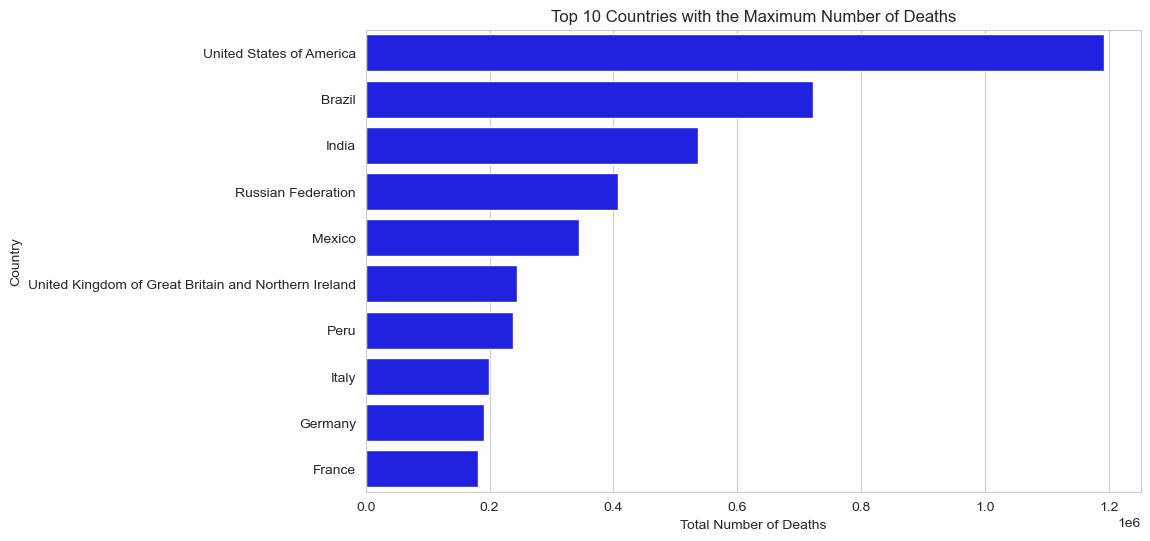

In [19]:
plt.figure(figsize=(10, 6))
sns.barplot(x=df_country_New_Daths.values[:10], y=df_country_New_Daths.index[:10],color='blue')
plt.xlabel('Total Number of Deaths')
plt.ylabel('Country')
plt.title('Top 10 Countries with the Maximum Number of Deaths')
plt.show()

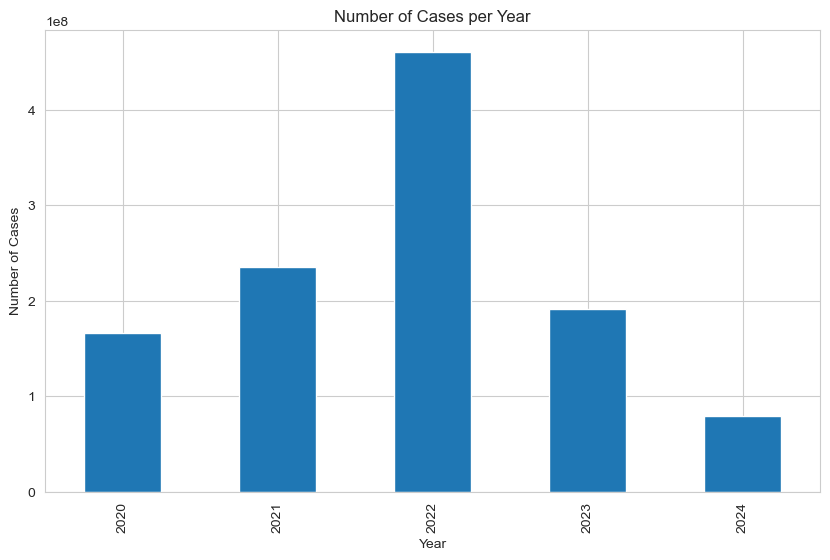

In [20]:
# Extract the year from the 'Date_reported' column
df['Year'] = pd.to_datetime(df['Date_reported']).dt.year

# Group the data by year and calculate the sum of cases
cases_per_year = df.groupby('Year')['New_cases'].sum()
cases_per_year_death = df.groupby('Year')['New_deaths'].sum()

# Plot the graph
cases_per_year.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Year')
plt.ylabel('Number of Cases')
plt.title('Number of Cases per Year')
plt.show()

In [21]:
Sum_New_cases = df.groupby('Year')['New_cases'].sum()

for i in range(len(Sum_New_cases)):
    print("Year: ", Sum_New_cases.index[i], "Total Cases: ", Sum_New_cases.iloc[i])


Year:  2020 Total Cases:  165665411.10826337
Year:  2021 Total Cases:  235521824.5849601
Year:  2022 Total Cases:  460551963.73379946
Year:  2023 Total Cases:  191091619.44599828
Year:  2024 Total Cases:  79505245.72420785


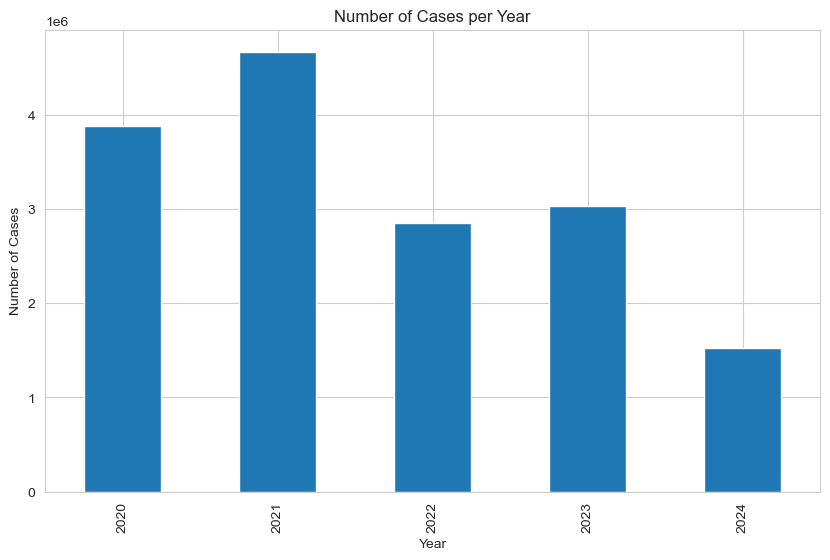

In [22]:
cases_per_year_death.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Year')
plt.ylabel('Number of Cases')
plt.title('Number of Cases per Year')
plt.show()

In [23]:
Sum_New_deaths = df.groupby('Year')['New_deaths'].sum()

for i in range(len(Sum_New_deaths)):
    print("Year: ", Sum_New_deaths.index[i], "Total Cases: ", Sum_New_deaths.iloc[i])


Year:  2020 Total Cases:  3875336.50295858
Year:  2021 Total Cases:  4666716.201183432
Year:  2022 Total Cases:  2846490.9644970414
Year:  2023 Total Cases:  3029938.4142011832
Year:  2024 Total Cases:  1524311.7633136094


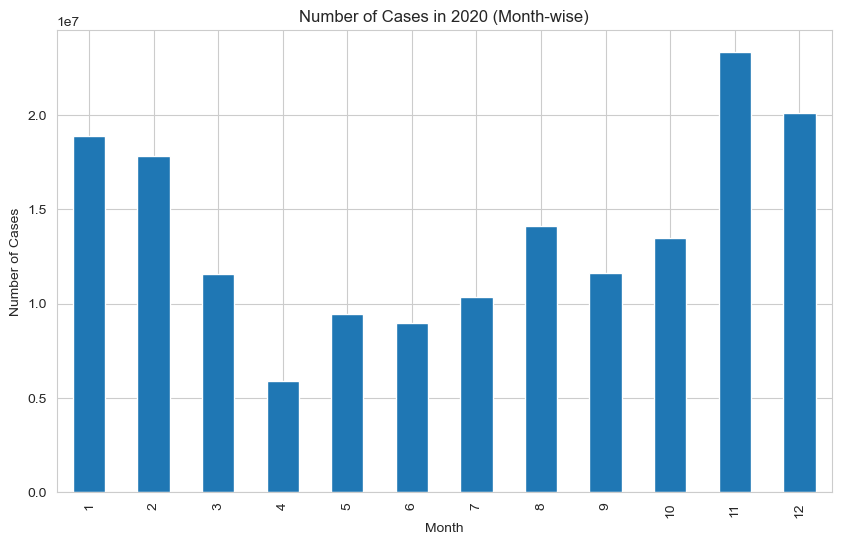

In [24]:
# Filter the data for the year 2022
df_2020 = df[df['Year'] == 2020]
# Extract the month from the 'Date_reported' column
df_2020['Month'] = pd.to_datetime(df_2020['Date_reported']).dt.month
# Group the data by month and calculate the sum of cases
cases_per_month = df_2020.groupby('Month')['New_cases'].sum()

# Plot the graph
plt.figure(figsize=(10, 6))
cases_per_month.plot(kind='bar')
plt.xlabel('Month')
plt.ylabel('Number of Cases')
plt.title('Number of Cases in 2020 (Month-wise)')
plt.show()

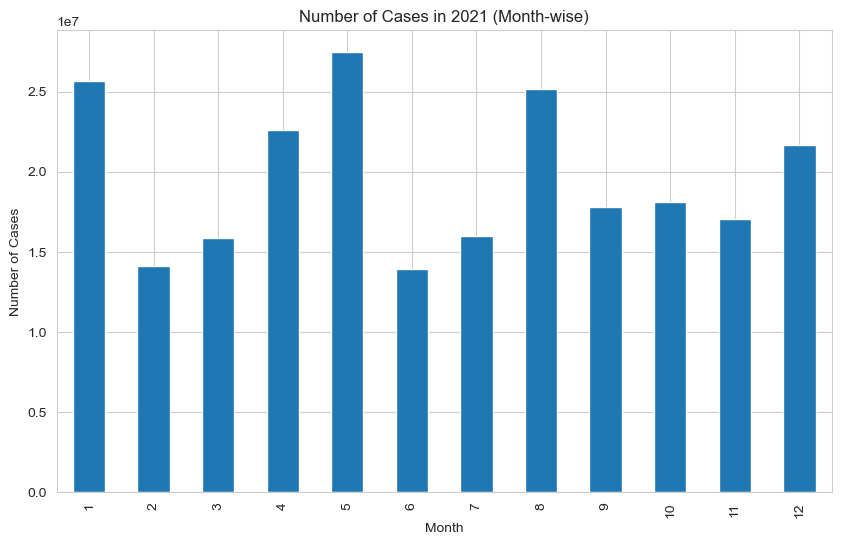

In [25]:
# Filter the data for the year 2022
df_2021 = df[df['Year'] == 2021]
# Extract the month from the 'Date_reported' column
df_2021['Month'] = pd.to_datetime(df_2021['Date_reported']).dt.month
# Group the data by month and calculate the sum of cases
cases_per_month = df_2021.groupby('Month')['New_cases'].sum()

# Plot the graph
plt.figure(figsize=(10, 6))
cases_per_month.plot(kind='bar')
plt.xlabel('Month')
plt.ylabel('Number of Cases')
plt.title('Number of Cases in 2021 (Month-wise)')
plt.show()

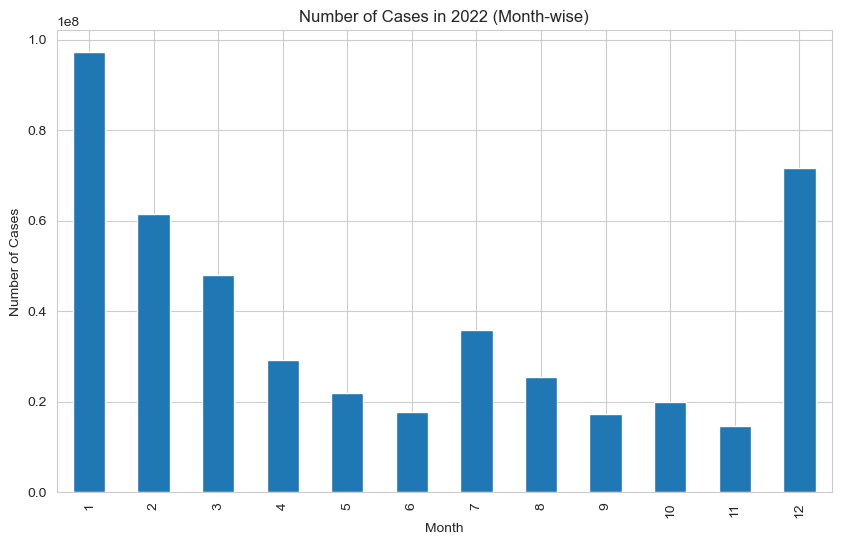

In [26]:
# Filter the data for the year 2022
df_2022 = df[df['Year'] == 2022]
# Extract the month from the 'Date_reported' column
df_2022['Month'] = pd.to_datetime(df_2022['Date_reported']).dt.month
# Group the data by month and calculate the sum of cases
cases_per_month = df_2022.groupby('Month')['New_cases'].sum()

# Plot the graph
plt.figure(figsize=(10, 6))
cases_per_month.plot(kind='bar')
plt.xlabel('Month')
plt.ylabel('Number of Cases')
plt.title('Number of Cases in 2022 (Month-wise)')
plt.show()

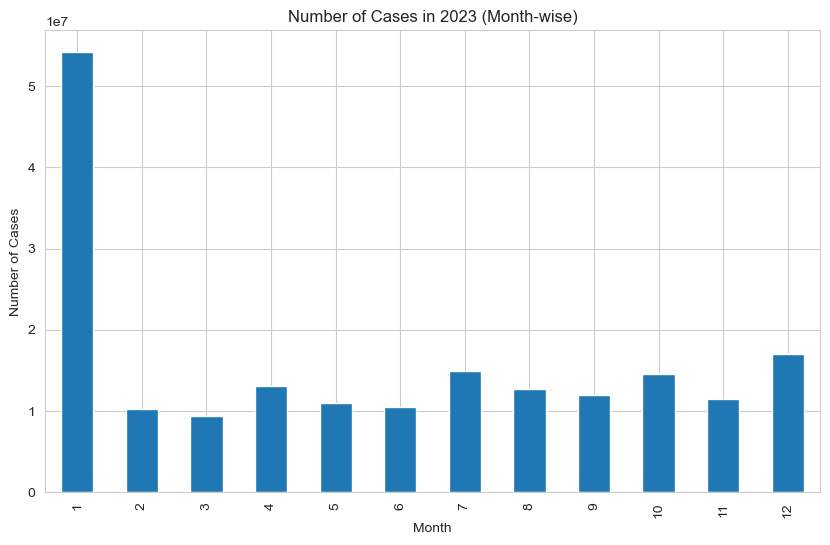

In [27]:
# Filter the data for the year 2022
df_2023 = df[df['Year'] == 2023]
# Extract the month from the 'Date_reported' column
df_2023['Month'] = pd.to_datetime(df_2023['Date_reported']).dt.month
# Group the data by month and calculate the sum of cases
cases_per_month = df_2023.groupby('Month')['New_cases'].sum()

# Plot the graph
plt.figure(figsize=(10, 6))
cases_per_month.plot(kind='bar')
plt.xlabel('Month')
plt.ylabel('Number of Cases')
plt.title('Number of Cases in 2023 (Month-wise)')
plt.show()

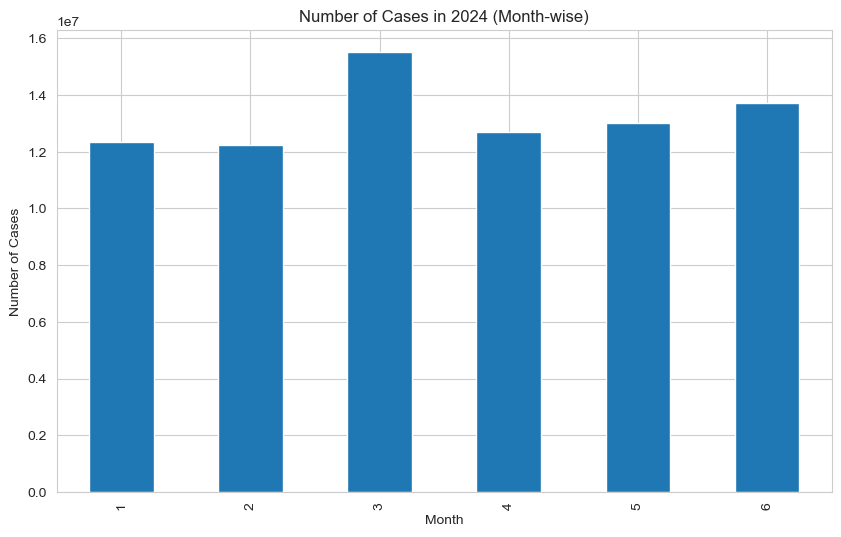

In [28]:
# Filter the data for the year 2022
df_2024 = df[df['Year'] == 2024]
# Extract the month from the 'Date_reported' column
df_2024['Month'] = pd.to_datetime(df_2024['Date_reported']).dt.month
# Group the data by month and calculate the sum of cases
cases_per_month = df_2024.groupby('Month')['New_cases'].sum()

# Plot the graph
plt.figure(figsize=(10, 6))
cases_per_month.plot(kind='bar')
plt.xlabel('Month')
plt.ylabel('Number of Cases')
plt.title('Number of Cases in 2024 (Month-wise)')
plt.show()

In [29]:
from sklearn.linear_model import LinearRegression

In [30]:
lr = LinearRegression()
lr.fit(df[['Year']], df['New_cases'])

LinearRegression()

In [31]:
print("Intercept: ", lr.intercept_)
print("Coefficient: ", lr.coef_)
print("R^2 Score: ", lr.score(df[['Year']], df['New_cases']))

Intercept:  -814242.5514385122
Coefficient:  [412.70954876]
R^2 Score:  5.728842809249457e-06


In [32]:
# Predict the number of cases for the year 2025 and 2026
print("Predicted number of cases in 2025: ", lr.predict([[2025]]))
print("Predicted number of cases in 2026: ", lr.predict([[2026]]))

Predicted number of cases in 2025:  [21494.28480828]
Predicted number of cases in 2026:  [21906.99435705]


# Regional Analysis
### compare the number of cases and deaths across different WHO regions.

In [33]:
df['WHO_region'].unique()

array(['EMRO', 'EURO', 'AFRO', 'WPRO', 'AMRO', 'SEARO', nan, 'OTHER'],
      dtype=object)

In [34]:
df[df['WHO_region'].isnull()]['Country'].unique()
df.fillna({'WHO_region': 'Other'}, inplace=True)
df.isnull().sum()

Date_reported        0
Country_code         0
Country              0
WHO_region           0
New_cases            0
Cumulative_cases     0
New_deaths           0
Cumulative_deaths    0
Year                 0
dtype: int64

In [35]:
df['WHO_region'].unique()

array(['EMRO', 'EURO', 'AFRO', 'WPRO', 'AMRO', 'SEARO', 'Other', 'OTHER'],
      dtype=object)

In [36]:
for region in df['WHO_region'].unique():
    print("Region: ", region)
    print("Number of Countries: ", df[df['WHO_region'] == region]['Country'].nunique())
    print("Number of Cases: ", df[df['WHO_region'] == region]['New_cases'].sum())
    print("Number of Deaths: ", df[df['WHO_region'] == region]['New_deaths'].sum())
    print()

Region:  EMRO
Number of Countries:  22
Number of Cases:  54851527.89293233
Number of Deaths:  1017109.7218934911

Region:  EURO
Number of Countries:  55
Number of Cases:  322099531.6482285
Number of Deaths:  3450761.75739645

Region:  AFRO
Number of Countries:  47
Number of Cases:  69589942.6763796
Number of Deaths:  2176335.4437869824

Region:  WPRO
Number of Countries:  34
Number of Cases:  282852173.93722546
Number of Deaths:  2104259.343195266

Region:  AMRO
Number of Countries:  47
Number of Cases:  256089246.69091
Number of Deaths:  4642790.313609468

Region:  SEARO
Number of Countries:  11
Number of Cases:  72997418.9434899
Number of Deaths:  1171844.6390532544

Region:  Other
Number of Countries:  18
Number of Cases:  45789009.343687445
Number of Deaths:  983096.9526627219

Region:  OTHER
Number of Countries:  6
Number of Cases:  28067213.46437576
Number of Deaths:  396595.67455621297



### Identify which regions are most affected.

Most affected region:  EURO
Number of Countries:  55
Number of Cases:  322099531.6482285
Number of Deaths:  3450761.75739645


<Axes: xlabel='WHO_region'>

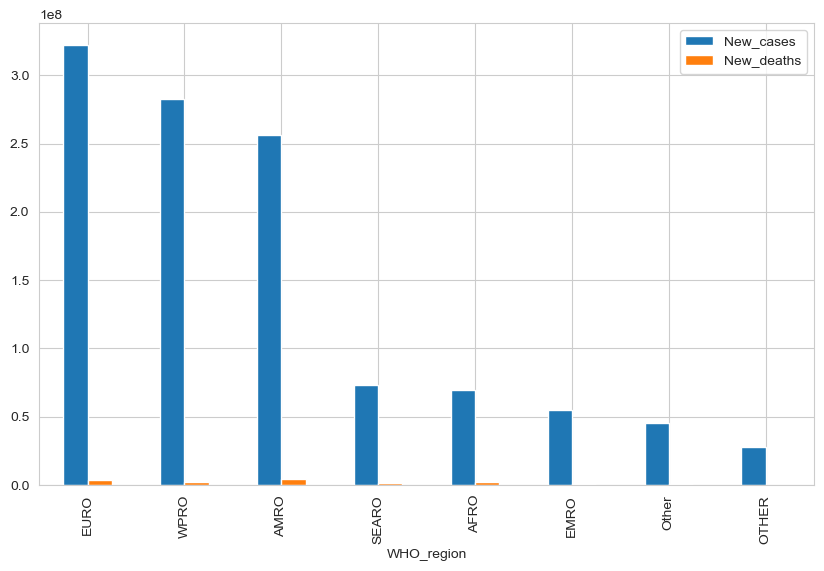

In [37]:
# Group the data by WHO_region and calculate the sum of new cases and new deaths
region_data = df.groupby('WHO_region').agg({'New_cases': 'sum', 'New_deaths': 'sum'})

# Sort the regions by the total number of new cases
most_affected_regions = region_data.sort_values(by='New_cases', ascending=False)

# Print the most affected region
print("Most affected region: ", most_affected_regions.index[0])
print("Number of Countries: ", df[df['WHO_region'] == most_affected_regions.index[0]]['Country'].nunique())
print("Number of Cases: ", df[df['WHO_region'] == most_affected_regions.index[0]]['New_cases'].sum())
print("Number of Deaths: ", df[df['WHO_region'] == most_affected_regions.index[0]]['New_deaths'].sum())
most_affected_regions.plot(kind='bar', figsize=(10, 6))

Text(0.5, 1.0, 'Case Fatality Rate for each Region')

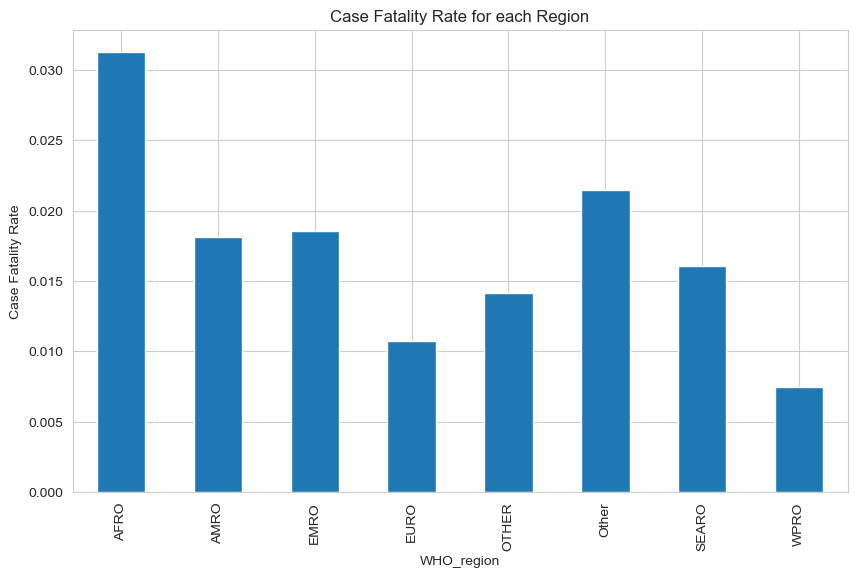

In [38]:
#Calculate the case fatality rate (CFR) for each region (CFR = Cumulative_deaths / Cumulative_cases).
region_data['CFR'] = region_data['New_deaths'] / region_data['New_cases']
region_data['CFR'].plot(kind='bar', figsize=(10, 6))
plt.ylabel('Case Fatality Rate')
plt.title('Case Fatality Rate for each Region')

Text(0.5, 1.0, 'Peak Daily New Cases and Deaths for each Region')

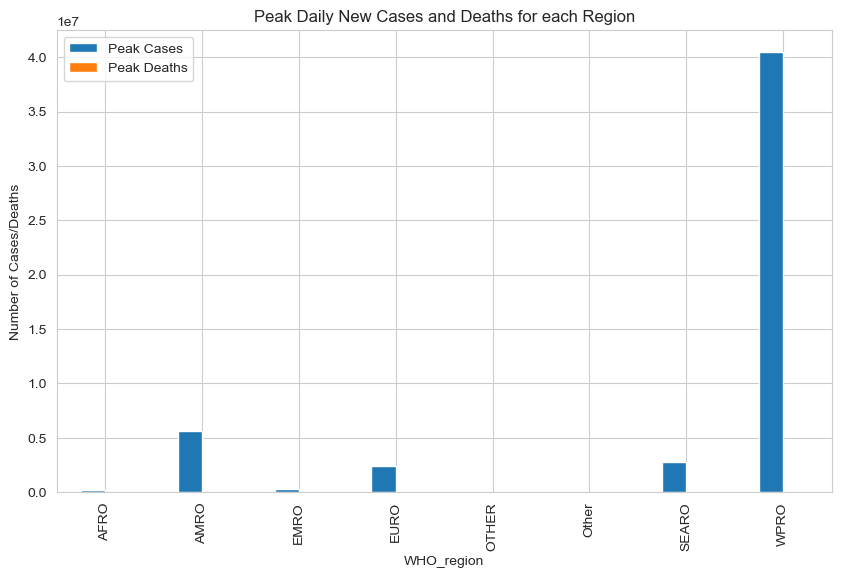

In [39]:
#Identify the dates when each region experienced their peak daily new cases and deaths and compare them.
peak_cases = df.groupby('WHO_region')['New_cases'].max()
peak_deaths = df.groupby('WHO_region')['New_deaths'].max()
peak_data = pd.concat([peak_cases, peak_deaths], axis=1)
peak_data.columns = ['Peak Cases', 'Peak Deaths']
peak_data.plot(kind='bar', figsize=(10, 6))
plt.ylabel('Number of Cases/Deaths')
plt.title('Peak Daily New Cases and Deaths for each Region')

Text(0.5, 1.0, 'Heatmap of New Cases in Different Regions over Time')

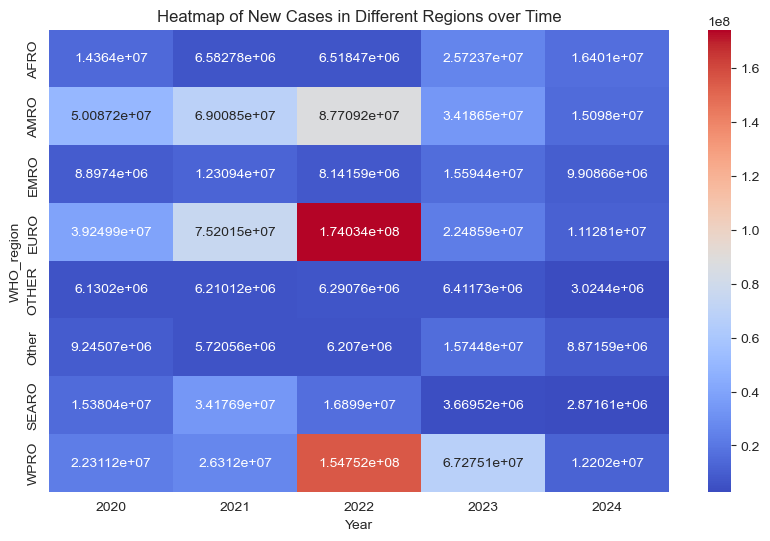

In [40]:
#Create heatmaps to visualize the intensity of new cases or deaths in different regions over time.
cases_heatmap = df.pivot_table(index='WHO_region', columns='Year', values='New_cases', aggfunc='sum')
plt.figure(figsize=(10, 6))
sns.heatmap(cases_heatmap, cmap='coolwarm', annot=True, fmt='g')
plt.title('Heatmap of New Cases in Different Regions over Time')


Text(0.5, 1.0, 'Weekly Growth Rate of New Cases and Deaths')

<Figure size 1000x600 with 0 Axes>

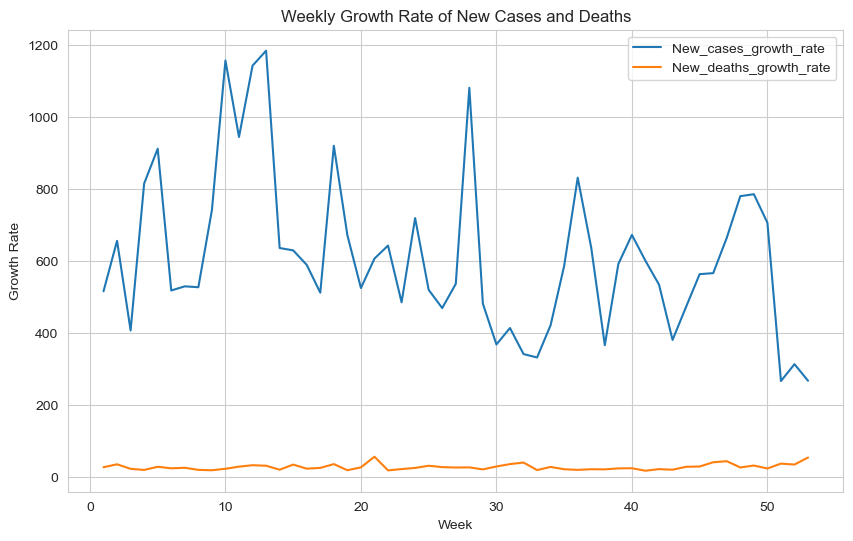

In [50]:
#Calculate the daily or weekly growth rate of new cases and deaths to identify periods of rapid increase or decrease.
plt.figure(figsize=(10, 6))
df['Date_reported'] = pd.to_datetime(df['Date_reported'])
df = df.sort_values(by='Date_reported')
df['New_cases_growth_rate'] = df['New_cases'].pct_change()
df['New_deaths_growth_rate'] = df['New_deaths'].pct_change()
df['Week'] = df['Date_reported'].dt.isocalendar().week
weekly_growth_rate = df.groupby('Week')[['New_cases_growth_rate', 'New_deaths_growth_rate']].mean()
weekly_growth_rate.plot(kind='line', figsize=(10, 6))
plt.ylabel('Growth Rate')
plt.title('Weekly Growth Rate of New Cases and Deaths')


# Country Analysis


<Figure size 1000x600 with 0 Axes>

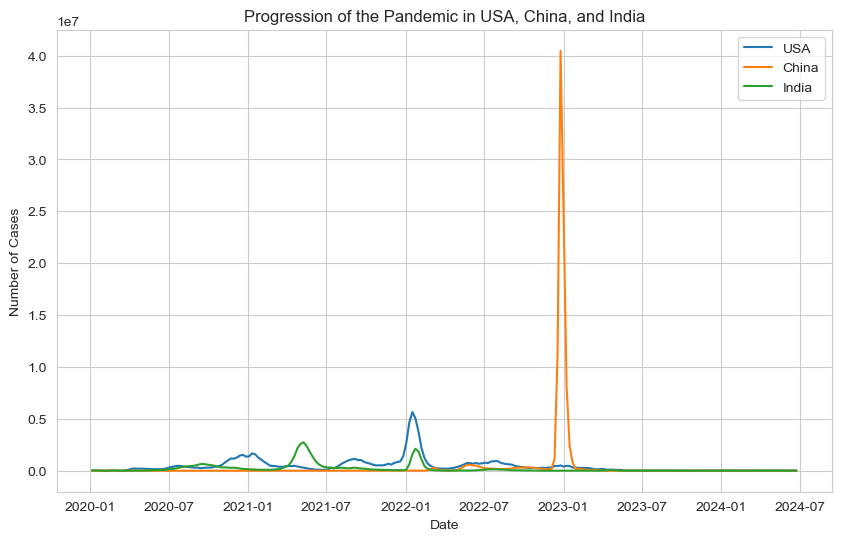

In [52]:
#Analyze the progression of the pandemic in top 3 countries.
plt.figure(figsize=(10, 6))
country_data_USA = df[df['Country'] == "United States of America"]
country_data_China = df[df['Country'] == "China"]
country_data_India = df[df['Country'] == "India"]
plt.figure(figsize=(10, 6))
plt.plot(country_data_USA['Date_reported'], country_data_USA['New_cases'], label='USA')
plt.plot(country_data_China['Date_reported'], country_data_China['New_cases'], label='China')   
plt.plot(country_data_India['Date_reported'], country_data_India['New_cases'], label='India')
plt.xlabel('Date')
plt.ylabel('Number of Cases')
plt.title('Progression of the Pandemic in USA, China, and India')
plt.legend()
plt.show()


<Figure size 1000x600 with 0 Axes>

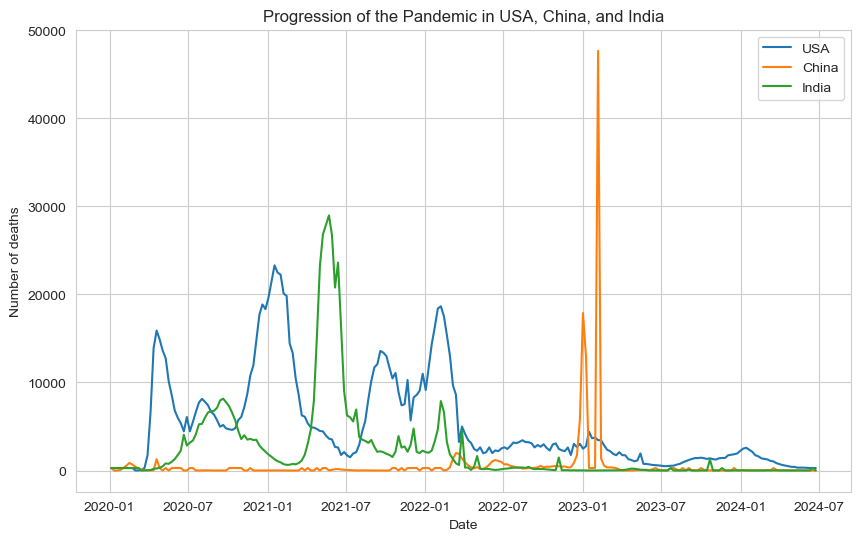

In [53]:
#Analyze the progression of the pandemic in top 3 countries.
plt.figure(figsize=(10, 6))
country_data_USA = df[df['Country'] == "United States of America"]
country_data_China = df[df['Country'] == "China"]
country_data_India = df[df['Country'] == "India"]
plt.figure(figsize=(10, 6))
plt.plot(country_data_USA['Date_reported'], country_data_USA['New_deaths'], label='USA')
plt.plot(country_data_China['Date_reported'], country_data_China['New_deaths'], label='China')   
plt.plot(country_data_India['Date_reported'], country_data_India['New_deaths'], label='India')
plt.xlabel('Date')
plt.ylabel('Number of deaths')
plt.title('Progression of the Pandemic in USA, China, and India')
plt.legend()
plt.show()

Text(0.5, 1.0, 'Comparison of the Pandemic Impact Across Different Countries')

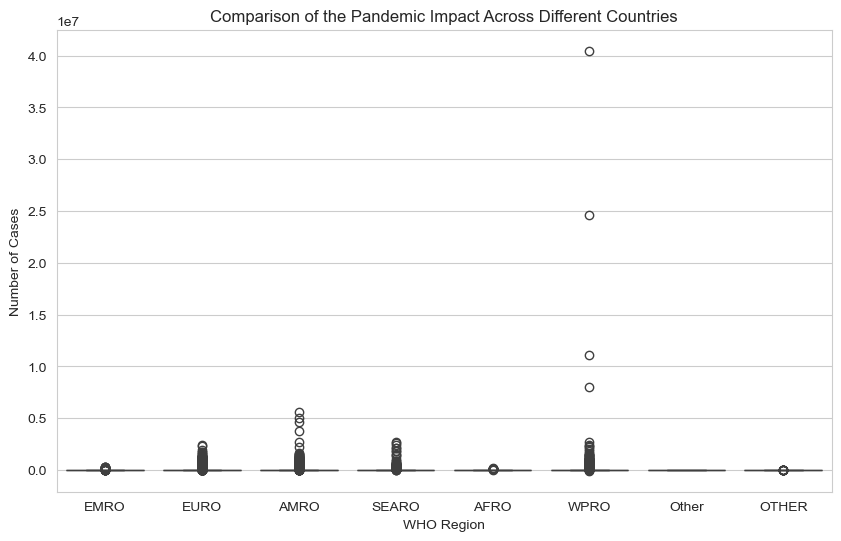

In [44]:
#Compare the pandemic's impact across different countries.
plt.figure(figsize=(10, 6))
sns.boxplot(x='WHO_region', y='New_cases', data=df)
plt.xlabel('WHO Region')
plt.ylabel('Number of Cases')
plt.title('Comparison of the Pandemic Impact Across Different Countries')


Text(0.5, 1.0, 'Comparison of the Pandemic Impact Across Different Countries')

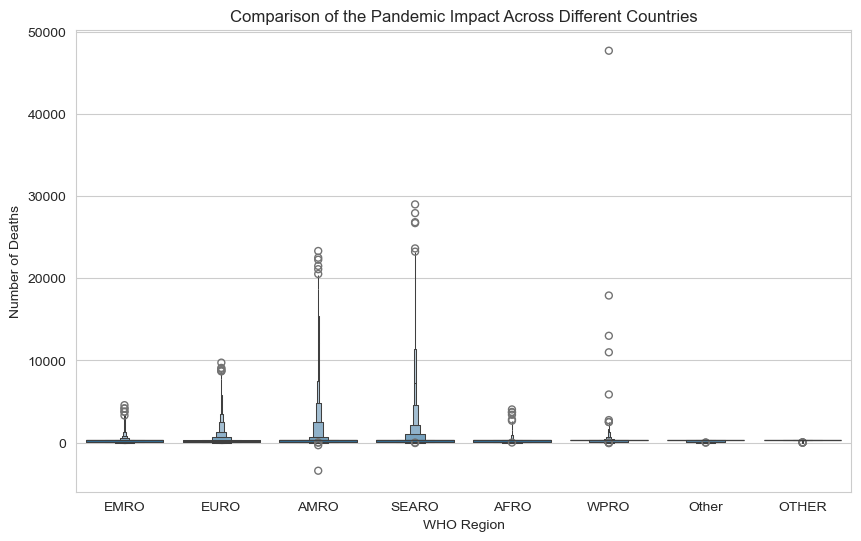

In [45]:
plt.figure(figsize=(10, 6))
sns.boxenplot(x='WHO_region', y='New_deaths', data=df)
plt.xlabel('WHO Region')
plt.ylabel('Number of Deaths')
plt.title('Comparison of the Pandemic Impact Across Different Countries')


# Moving Averages

<Figure size 1000x600 with 0 Axes>

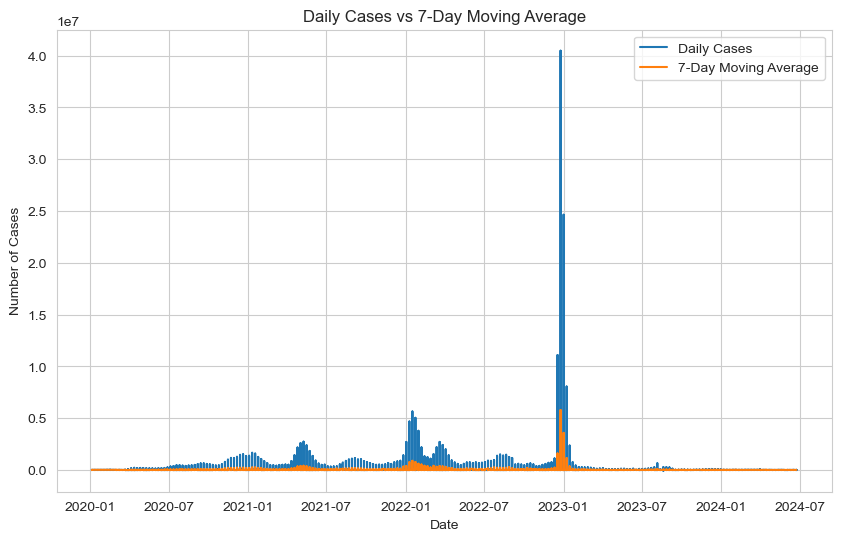

In [54]:
#Calculate moving averages to smooth out daily fluctuations and identify longer-term trends.
plt.figure(figsize=(10, 6))
df['New_cases_moving_average'] = df['New_cases'].rolling(window=7).mean()
df['New_deaths_moving_average'] = df['New_deaths'].rolling(window=7).mean()
plt.figure(figsize=(10, 6))
plt.plot(df['Date_reported'], df['New_cases'], label='Daily Cases')
plt.plot(df['Date_reported'], df['New_cases_moving_average'], label='7-Day Moving Average')
plt.xlabel('Date')
plt.ylabel('Number of Cases')
plt.title('Daily Cases vs 7-Day Moving Average')
plt.legend()
plt.show()

# Correlation Analysis

Text(0.5, 1.0, 'Correlation between New Cases and New Deaths')

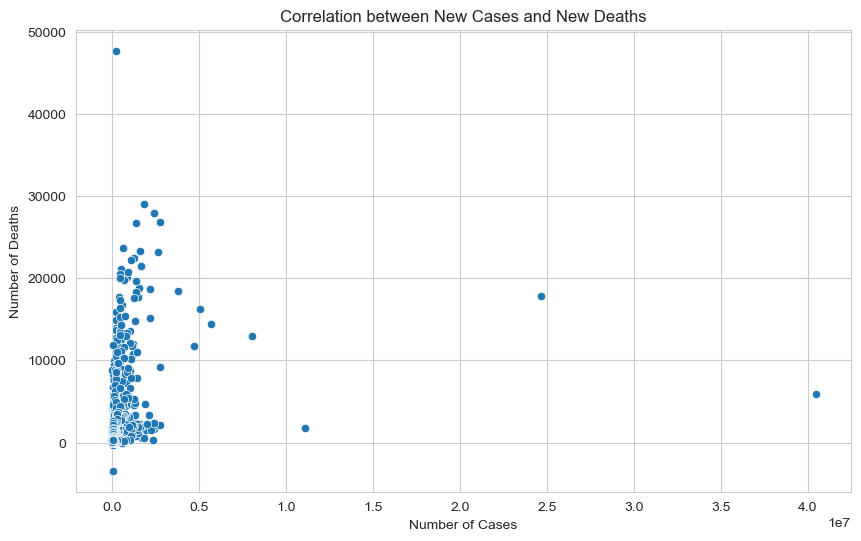

In [47]:
#Analyze the correlation between new cases and new deaths.
plt.figure(figsize=(10, 6))
sns.scatterplot(x='New_cases', y='New_deaths', data=df)
plt.xlabel('Number of Cases')
plt.ylabel('Number of Deaths')
plt.title('Correlation between New Cases and New Deaths')

Text(0.5, 1.0, 'Percentage of Global Total Cases and Deaths contributed by each Region')

<Figure size 1000x600 with 0 Axes>

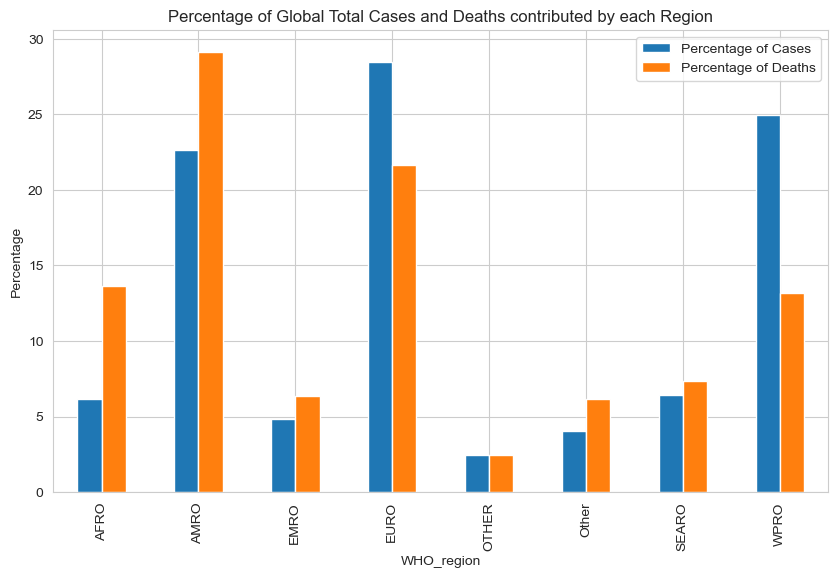

In [55]:
#Calculate what percentage of the global total cases and deaths each region contributes.
plt.figure(figsize=(10, 6))
global_cases = df['New_cases'].sum()
global_deaths = df['New_deaths'].sum()
region_data['Percentage of Cases'] = (region_data['New_cases'] / global_cases) * 100
region_data['Percentage of Deaths'] = (region_data['New_deaths'] / global_deaths) * 100
region_data[['Percentage of Cases', 'Percentage of Deaths']].plot(kind='bar', figsize=(10, 6))
plt.ylabel('Percentage')
plt.title('Percentage of Global Total Cases and Deaths contributed by each Region')
